<a href="https://colab.research.google.com/github/vicduch/apprentissageMLPython/blob/main/Apprentissage_Python_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séléction de données

## Différence .loc et .iloc

In [ ]:
import pandas as pd

donnees = {
    'Age': [45, 52, 34, 29, 68],
    'Genre': ['H', 'F', 'F', 'H', 'F'],
    'TensionArtérielle': [120, 132, 115, 118, 140],
    'Cholestérol': [210, 240, 190, 180, 260]
}
index_patients = ['P001', 'P002', 'P003', 'P004', 'P005']

df_patients = pd.DataFrame(donnees, index=index_patients)

print("Voici le DataFrame de départ :")
print(df_patients)

Voici le DataFrame de départ :
      Age Genre  TensionArtérielle  Cholestérol
P001   45     H                120          210
P002   52     F                132          240
P003   34     F                115          190
P004   29     H                118          180
P005   68     F                140          260


#### Tâches à effectuer :

1. Sélectionnez et affichez toutes les informations du patient avec l'identifiant 'P002'.

2. Sélectionnez et affichez la valeur unique de la tension artérielle (TensionArtérielle) pour le patient 'P005'.

3. En utilisant uniquement des positions numériques, sélectionnez et affichez les données des deux premiers patients (P001 et P002) pour les colonnes Genre et TensionArtérielle.

4. En utilisant uniquement des positions numériques, sélectionnez et affichez un "sous-DataFrame" contenant les trois dernières lignes et les deux dernières colonnes.

In [ ]:
données_p002 = df_patients.loc['P002']
print("\nDonnées du patient P002 :")
print(données_p002)

tension_p005 = df_patients.loc['P005', 'TensionArtérielle']
print("\nTension du patient P005 :")
print(tension_p005)

deux_premiers_patients = df_patients.iloc[:2, [1,2]]
print("\nDeux premiers patients :")
print(deux_premiers_patients)

sous_df = df_patients.iloc[-3:,-2:]
print(sous_df)



Données du patient P002 :
Age                   52
Genre                  F
TensionArtérielle    132
Cholestérol          240
Name: P002, dtype: object

Tension du patient P005 :
140

Deux premiers patients :
     Genre  TensionArtérielle
P001     H                120
P002     F                132
      TensionArtérielle  Cholestérol
P003                115          190
P004                118          180
P005                140          260


#### *Remarques : Attention à bien utiliser les index de colonnes dans .iloc*

## Filtrage conditionnel

#### Tâches à effectuer

En réutilisant le même dataset

1. Créez un nouveau DataFrame, df_seniors, qui contient uniquement les patients de plus de 50 ans.

2. Créez un nouveau DataFrame, df_femmes, qui contient uniquement les patientes (Genre égal à 'F').

3. Vous suspectez un risque cardiovasculaire accru chez certaines patientes. Créez un DataFrame df_risque_eleve qui ne contient que les patientes (Genre 'F') qui ont également un taux de cholestérol supérieur à 200.

In [ ]:
seniors = df_patients['Age']>50
df_seniors = df_patients[seniors]
print(df_seniors)

femmes = df_patients['Genre']=='F'
df_femmes = df_patients[femmes]
print(df_femmes)

risque_eleve = df_patients['Cholestérol']>200
df_risque_eleve = df_patients[(femmes) & (risque_eleve)]
print(df_risque_eleve)

      Age Genre  TensionArtérielle  Cholestérol
P002   52     F                132          240
P005   68     F                140          260
      Age Genre  TensionArtérielle  Cholestérol
P002   52     F                132          240
P003   34     F                115          190
P005   68     F                140          260
      Age Genre  TensionArtérielle  Cholestérol
P002   52     F                132          240
P005   68     F                140          260


#### *Remarques : Bien penser à écrire sur la même ligne pour simplifier :*

```
df_risque_eleve_alt = df_patients[(df_patients['Genre'] == 'F') & (df_patients['Cholestérol'] > 200)]
```




# Création et modifications de données

## Création de colonnes


In [ ]:
import pandas as pd

donnees = {
    'Age': [45, 52, 34, 29, 68],
    'Genre': ['H', 'F', 'F', 'H', 'F'],
    'TensionArtérielle': [120, 132, 115, 118, 140],
    'Cholestérol': [210, 240, 190, 180, 260]
}
index_patients = ['P001', 'P002', 'P003', 'P004', 'P005']

df_patients = pd.DataFrame(donnees, index=index_patients)

#### Tâches à effectuer
1. Nous sommes en 2025. Créez une nouvelle colonne nommée AnneeNaissance qui contient l'année de naissance approximative de chaque patient.

2. Pour évaluer un facteur de risque, un chercheur a émis l'hypothèse qu'un indice *Cholestérol/Age* pourrait être pertinent. Créez une nouvelle colonne nommée IndiceRisque qui contient le résultat de cette division.

3. Après avoir créé les deux colonnes, affichez le DataFrame complet pour vérifier le résultat.

In [ ]:
df_patients['AnneeNaissance'] = 2025 - df_patients['Age']
print(df_patients['AnneeNaissance'])

df_patients['IndiceRisque'] = df_patients['Cholestérol']/df_patients['Age']
print(df_patients['IndiceRisque'])

print(df_patients)

P001    1980
P002    1973
P003    1991
P004    1996
P005    1957
Name: AnneeNaissance, dtype: int64
P001    4.666667
P002    4.615385
P003    5.588235
P004    6.206897
P005    3.823529
Name: IndiceRisque, dtype: float64
      Age Genre  TensionArtérielle  Cholestérol  AnneeNaissance  IndiceRisque
P001   45     H                120          210            1980      4.666667
P002   52     F                132          240            1973      4.615385
P003   34     F                115          190            1991      5.588235
P004   29     H                118          180            1996      6.206897
P005   68     F                140          260            1957      3.823529


*Remarques :*

La création de la colonne IndiceRisque est un exemple simple mais fondamental de ce que l'on appelle le Feature Engineering (création de variables).

À votre avis, pourquoi un indice comme celui-ci pourrait être plus puissant pour un modèle de Machine Learning que de simplement utiliser les colonnes Age et Cholestérol séparément ?

... C'est parce que cet indice capture une interaction entre les deux variables. Un taux de cholestérol de 260 n'a pas la même signification pour une personne de 29 ans que pour une personne de 68 ans. Votre nouvelle variable IndiceRisque contient cette information nuancée en un seul chiffre. C'est en créant ce genre de variables pertinentes que les data scientists apportent le plus de valeur.

## Création de colonnes conditionnelle

#### Tâches à effectuer

1. Créez une nouvelle colonne CategorieTension. Si la TensionArtérielle d'un patient est strictement supérieure à 125, la valeur doit être 'Haute'. Sinon, la valeur doit être 'Normale'.

2. Créez une colonne StatutRisque. Le statut doit être 'Élevé' uniquement si l'IndiceRisque est supérieur à 4.5 ET que l'Age est supérieur à 50. Dans tous les autres cas, le statut doit être 'Normal'.

3. Affichez le DataFrame final avec ces deux nouvelles colonnes de catégories.

In [ ]:
import numpy as np

df_patients['CategorieTension'] = np.where(df_patients['TensionArtérielle']>125,'Haute','Normale')
print(df_patients['CategorieTension'])

df_patients['StatutRisque'] = np.where((df_patients['IndiceRisque']>4.5) & (df_patients['Age']>50), 'Elevé', 'Normal')
print(df_patients['StatutRisque'])

print(df_patients)

P001    Normale
P002      Haute
P003    Normale
P004    Normale
P005      Haute
Name: CategorieTension, dtype: object
P001    Normal
P002     Elevé
P003    Normal
P004    Normal
P005    Normal
Name: StatutRisque, dtype: object
      Age Genre  TensionArtérielle  Cholestérol  AnneeNaissance  IndiceRisque  \
P001   45     H                120          210            1980      4.666667   
P002   52     F                132          240            1973      4.615385   
P003   34     F                115          190            1991      5.588235   
P004   29     H                118          180            1996      6.206897   
P005   68     F                140          260            1957      3.823529   

     CategorieTension StatutRisque  
P001          Normale       Normal  
P002            Haute        Elevé  
P003          Normale       Normal  
P004          Normale       Normal  
P005            Haute       Normal  


## Exo récap session 1

#### Tâches à effectuer

1. Sélection : En utilisant la méthode la plus appropriée, sélectionnez et affichez la ligne correspondant au produit dont l'identifiant est 'PROD-004'.

2. Filtrage : Créez un nouveau DataFrame df_top_produits qui contient uniquement les produits de la catégorie 'Cuisine' ayant réalisé plus de 100 ventes mensuelles.

3. Création de colonne (calcul) : Créez une nouvelle colonne ChiffreAffaires qui correspond au revenu généré par chaque produit (PrixUnitaire * VentesMensuelles).

4. Création de colonne (conditionnelle) : Le service marketing souhaite identifier les "Produits Vedettes". Créez une colonne Statut qui aura la valeur 'Vedette' si la NoteClient est supérieure ou égale à 4.5 ET que le ChiffreAffaires est supérieur à 5000. Dans tous les autres cas, la valeur sera 'Standard'.

Bonus : Affichez uniquement les colonnes NomProduit et Statut des produits qui ont été classés 'Vedette'.


In [ ]:
import pandas as pd
import numpy as np

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35],
    'NoteClient': [4.6, 4.8, 4.2, 4.9, 4.1]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']

df_ventes = pd.DataFrame(catalogue, index=id_produits)

print("Voici le DataFrame de départ :")
print(df_ventes)

Voici le DataFrame de départ :
             NomProduit      Categorie  PrixUnitaire  VentesMensuelles  \
PROD-001    Cafetière A        Cuisine         59.90               150   
PROD-002   Bouilloire B        Cuisine         29.99               230   
PROD-003  Grille-pain C        Cuisine         45.00                80   
PROD-004       Mixeur D        Cuisine         79.50               110   
PROD-005        Robot E  Petit-Électro        249.99                35   

          NoteClient  
PROD-001         4.6  
PROD-002         4.8  
PROD-003         4.2  
PROD-004         4.9  
PROD-005         4.1  


In [ ]:
#Question 1

p004 = df_ventes.loc["PROD-004"]
print(p004)

#Question 2
df_cuisine_100 = df_ventes[(df_ventes["Categorie"] == "Cuisine") & (df_ventes["VentesMensuelles"]>100)]
print(df_cuisine_100)

#Question 3
df_ventes['ChiffresAffaires'] = df_ventes['PrixUnitaire']*df_ventes['VentesMensuelles']
print(df_ventes)

#Question 4
produits_vedettes = (df_ventes['NoteClient']>4.5)&(df_ventes['ChiffresAffaires']>5000)
df_ventes['Statut'] = np.where(produits_vedettes,'Vedettes','Standard')
print(df_ventes['Statut'])

#Bonus
df_bonus = df_ventes.loc[df_ventes['Statut']=='Vedettes',["NomProduit","Statut"]]
print(df_bonus)

NomProduit          Mixeur D
Categorie            Cuisine
PrixUnitaire            79.5
VentesMensuelles         110
NoteClient               4.9
ChiffresAffaires      8745.0
Statut              Vedettes
Name: PROD-004, dtype: object
            NomProduit Categorie  PrixUnitaire  VentesMensuelles  NoteClient  \
PROD-001   Cafetière A   Cuisine         59.90               150         4.6   
PROD-002  Bouilloire B   Cuisine         29.99               230         4.8   
PROD-004      Mixeur D   Cuisine         79.50               110         4.9   

          ChiffresAffaires    Statut  
PROD-001            8985.0  Vedettes  
PROD-002            6897.7  Vedettes  
PROD-004            8745.0  Vedettes  
             NomProduit      Categorie  PrixUnitaire  VentesMensuelles  \
PROD-001    Cafetière A        Cuisine         59.90               150   
PROD-002   Bouilloire B        Cuisine         29.99               230   
PROD-003  Grille-pain C        Cuisine         45.00                

*Beaucoup d'erreurs faites pour la question 2 : toujours bien utiliser une selection de df_ventes, donc

```
df_ventes[(df_ventes[condition1])&(df_ventes[condition2])]
```



## GroupBy

In [ ]:
import pandas as pd
import numpy as np

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35],
    'NoteClient': [4.6, 4.8, 4.2, 4.9, 4.1]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']
df_ventes = pd.DataFrame(catalogue, index=id_produits)
df_ventes['ChiffreAffaires'] = df_ventes['PrixUnitaire'] * df_ventes['VentesMensuelles']
produits_vedettes = (df_ventes['NoteClient'] >= 4.5) & (df_ventes['ChiffreAffaires'] > 5000)
df_ventes['Statut'] = np.where(produits_vedettes, 'Vedette', 'Standard')

print("Rappel du DataFrame final :")
print(df_ventes)

Rappel du DataFrame final :
             NomProduit      Categorie  PrixUnitaire  VentesMensuelles  \
PROD-001    Cafetière A        Cuisine         59.90               150   
PROD-002   Bouilloire B        Cuisine         29.99               230   
PROD-003  Grille-pain C        Cuisine         45.00                80   
PROD-004       Mixeur D        Cuisine         79.50               110   
PROD-005        Robot E  Petit-Électro        249.99                35   

          NoteClient  ChiffreAffaires    Statut  
PROD-001         4.6          8985.00   Vedette  
PROD-002         4.8          6897.70   Vedette  
PROD-003         4.2          3600.00  Standard  
PROD-004         4.9          8745.00   Vedette  
PROD-005         4.1          8749.65  Standard  


#### Tâches à effectuer

1. Calculez le chiffre d'affaires total pour chaque Categorie.

2. Calculez la note client moyenne pour chaque Categorie.

3. Comptez le nombre de produits qu'il y a dans chaque Statut ('Vedette' et 'Standard'). Pour cela, vous pouvez grouper par Statut et compter les NomProduit.

In [ ]:
df_ca_groupe = df_ventes.groupby(df_ventes['Categorie'])['ChiffreAffaires'].sum()
print(df_ca_groupe)

df_ca_groupe = df_ventes.groupby(df_ventes['Categorie'])['NoteClient'].mean()
print(df_ca_groupe)

df_ca_groupe = df_ventes.groupby(df_ventes['Statut'])['NomProduit'].count()
print(df_ca_groupe)

Categorie
Cuisine          28227.70
Petit-Électro     8749.65
Name: ChiffreAffaires, dtype: float64
Categorie
Cuisine          4.625
Petit-Électro    4.100
Name: NoteClient, dtype: float64
Statut
Standard    2
Vedette     3
Name: NomProduit, dtype: int64


## Agg

In [ ]:
import pandas as pd
import numpy as np

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35],
    'NoteClient': [4.6, 4.8, 4.2, 4.9, 4.1]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']
df_ventes = pd.DataFrame(catalogue, index=id_produits)
df_ventes['ChiffreAffaires'] = df_ventes['PrixUnitaire'] * df_ventes['VentesMensuelles']
produits_vedettes = (df_ventes['NoteClient'] >= 4.5) & (df_ventes['ChiffreAffaires'] > 5000)
df_ventes['Statut'] = np.where(produits_vedettes, 'Vedette', 'Standard')

#### Tâches à effectuer

1. Agrégation simple : En groupant par Categorie, utilisez .agg() avec une liste pour calculer la somme (sum), la moyenne (mean), le minimum (min) et le maximum (max) de la colonne ChiffreAffaires.

2. Agrégation avancée : En groupant par Categorie, utilisez .agg() avec un dictionnaire pour créer un rapport qui calcule :
- Le total du ChiffreAffaires (sum).
- La moyenne de la NoteClient (mean).
- Le nombre de produits dans la catégorie (en utilisant count sur NomProduit).

In [ ]:
df_ca_agg_simple = df_ventes.groupby('Categorie')['ChiffreAffaires'].agg(['sum','mean','min','max'])
print(df_ca_agg_simple)

aggreg_dict = {'ChiffreAffaires':'sum','NoteClient':'mean','NomProduit':'count'}
df_ca_agg_adv = df_ventes.groupby('Categorie').agg(aggreg_dict)
print(df_ca_agg_adv)

                    sum      mean      min      max
Categorie                                          
Cuisine        28227.70  7056.925  3600.00  8985.00
Petit-Électro   8749.65  8749.650  8749.65  8749.65
               ChiffreAffaires  NoteClient  NomProduit
Categorie                                             
Cuisine               28227.70       4.625           4
Petit-Électro          8749.65       4.100           1


## Trier les valeurs

In [ ]:
import pandas as pd
import numpy as np

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35],
    'NoteClient': [4.6, 4.8, 4.2, 4.9, 4.1]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']
df_ventes = pd.DataFrame(catalogue, index=id_produits)
df_ventes['ChiffreAffaires'] = df_ventes['PrixUnitaire'] * df_ventes['VentesMensuelles']
produits_vedettes = (df_ventes['NoteClient'] >= 4.5) & (df_ventes['ChiffreAffaires'] > 5000)
df_ventes['Statut'] = np.where(produits_vedettes, 'Vedette', 'Standard')

# Création directe du rapport
aggreg_dict = {'ChiffreAffaires': 'sum', 'NoteClient': 'mean', 'NomProduit': 'count'}
df_rapport = df_ventes.groupby('Categorie').agg(aggreg_dict)

print("Voici le rapport non trié :")
print(df_rapport)

Voici le rapport non trié :
               ChiffreAffaires  NoteClient  NomProduit
Categorie                                             
Cuisine               28227.70       4.625           4
Petit-Électro          8749.65       4.100           1


#### Tâches à effectuer

1. Affichez le rapport trié par ChiffreAffaires décroissant (la catégorie la plus performante en premier).

2. Affichez le rapport trié par NoteClient croissant (la catégorie avec la moins bonne note moyenne en premier).

In [ ]:
print(df_rapport.sort_values(by = 'ChiffreAffaires',ascending = False))
print(df_rapport.sort_values(by = 'NoteClient',ascending = True))


               ChiffreAffaires  NoteClient  NomProduit
Categorie                                             
Cuisine               28227.70       4.625           4
Petit-Électro          8749.65       4.100           1
               ChiffreAffaires  NoteClient  NomProduit
Categorie                                             
Petit-Électro          8749.65       4.100           1
Cuisine               28227.70       4.625           4


# Visualisation de données

### Matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Importation conventionnelle de Matplotlib

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']
df_ventes = pd.DataFrame(catalogue, index=id_produits)
df_ventes['ChiffreAffaires'] = df_ventes['PrixUnitaire'] * df_ventes['VentesMensuelles']

# On crée le rapport agrégé qui nous servira de source pour le graphique
rapport_ca = df_ventes.groupby('Categorie')['ChiffreAffaires'].sum()

print("Données à visualiser :")
print(rapport_ca)

Données à visualiser :
Categorie
Cuisine          28227.70
Petit-Électro     8749.65
Name: ChiffreAffaires, dtype: float64


#### Tâches à effectuer
En utilisant matplotlib.pyplot (alias plt), créez un diagramme en barres simple qui montre le chiffre d'affaires pour chaque catégorie.

Indices :
1. La fonction principale à utiliser est plt.bar().
2. Cette fonction a besoin de savoir ce qu'il faut mettre sur l'axe des X (les catégories) et sur l'axe des Y (le chiffre d'affaires).
3. Pour un objet Série comme rapport_ca, vous pouvez accéder aux catégories avec rapport_ca.index et aux valeurs avec rapport_ca.values.
4. Après avoir défini votre graphique, utilisez plt.show() pour l'afficher.



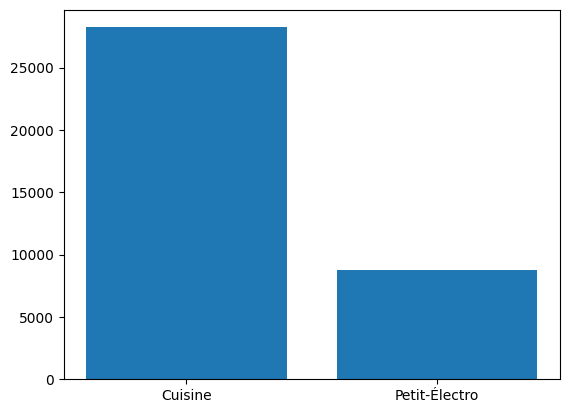

In [ ]:
plt.bar(rapport_ca.index, rapport_ca.values)
plt.show()

#### Tâches à effectuer

En partant de votre code plt.bar(...), ajoutez-lui :

1. Le titre : "Chiffre d'Affaires Total par Catégorie"
2. L'étiquette de l'axe X : "Catégorie de Produit"
3. L'étiquette de l'axe Y : "Chiffre d'Affaires (en €)"

#### Bar chart vertical

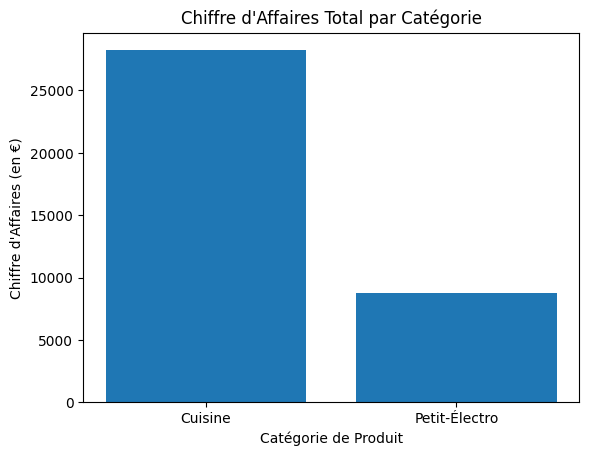

In [ ]:
plt.bar(rapport_ca.index, rapport_ca.values)
plt.title("Chiffre d'Affaires Total par Catégorie")
plt.xlabel("Catégorie de Produit")
plt.ylabel("Chiffre d'Affaires (en €)")
plt.show()

#### Bar chart horizontal

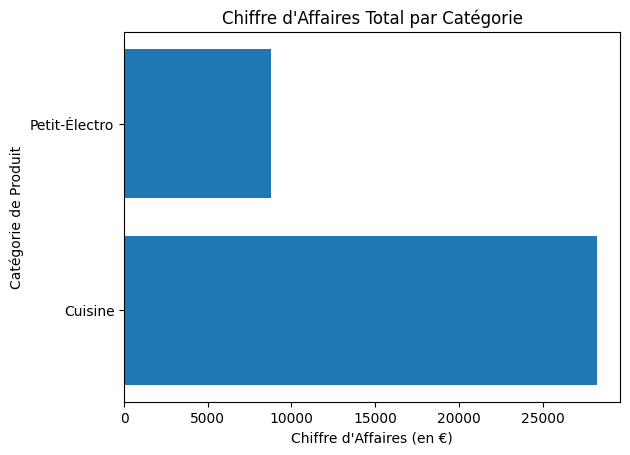

In [ ]:
plt.barh(rapport_ca.index, rapport_ca.values)
plt.title("Chiffre d'Affaires Total par Catégorie")
plt.ylabel("Catégorie de Produit")
plt.xlabel("Chiffre d'Affaires (en €)")
plt.show()

### Seaborn

#### Bar chart

In [ ]:
import pandas as pd
import seaborn as sns # Importation conventionnelle de Seaborn
import matplotlib.pyplot as plt # On a toujours besoin de Matplotlib pour afficher

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']
df_ventes = pd.DataFrame(catalogue, index=id_produits)
df_ventes['ChiffreAffaires'] = df_ventes['PrixUnitaire'] * df_ventes['VentesMensuelles']

print("DataFrame utilisé par Seaborn :")
print(df_ventes)

DataFrame utilisé par Seaborn :
             NomProduit      Categorie  PrixUnitaire  VentesMensuelles  \
PROD-001    Cafetière A        Cuisine         59.90               150   
PROD-002   Bouilloire B        Cuisine         29.99               230   
PROD-003  Grille-pain C        Cuisine         45.00                80   
PROD-004       Mixeur D        Cuisine         79.50               110   
PROD-005        Robot E  Petit-Électro        249.99                35   

          ChiffreAffaires  
PROD-001          8985.00  
PROD-002          6897.70  
PROD-003          3600.00  
PROD-004          8745.00  
PROD-005          8749.65  


#### Tâches à effectuer

En utilisant seaborn.barplot(), créez un diagramme en barres qui montre le chiffre d'affaires pour chaque catégorie.

Indices :

La fonction sns.barplot() a plusieurs paramètres, mais les plus importants sont :

- data: Le DataFrame que vous voulez utiliser (ici, df_ventes).

- x: Le nom de la colonne pour l'axe des X (ici, 'Categorie').

- y: Le nom de la colonne pour l'axe des Y (ici, 'ChiffreAffaires').

Par défaut, si Seaborn trouve plusieurs lignes pour une même catégorie sur l'axe X, il calcule et affiche la moyenne. Pour lui demander de faire la somme, il faut ajouter le paramètre estimator=sum.

N'oubliez pas plt.show() à la fin pour afficher le graphique.


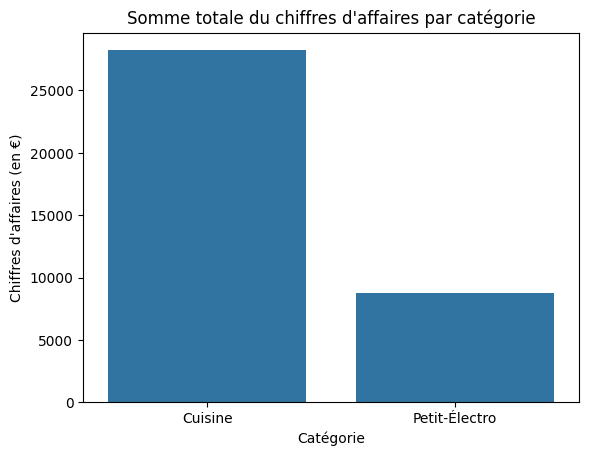

In [ ]:
sns.barplot(data = df_ventes, x = 'Categorie', y = 'ChiffreAffaires', estimator = 'sum', errorbar=None)
plt.xlabel('Catégorie')
plt.ylabel("Chiffres d'affaires (en €)")
plt.title("Somme totale du chiffres d'affaires par catégorie")
plt.show()

#### Hist plot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Code de création du df_ventes) ...
df_ventes = pd.DataFrame({
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35]
})

#### Tâche à effectuer

Créez un histogramme de la colonne PrixUnitaire de notre DataFrame df_ventes.

Indices :

1. Utilisez la fonction sns.histplot().

2. Ses principaux arguments sont data (votre DataFrame) et x (le nom de la colonne dont vous voulez voir la distribution).

3. Vous pouvez aussi ajouter un titre et des labels comme nous l'avons fait précédemment pour rendre le graphique plus clair.

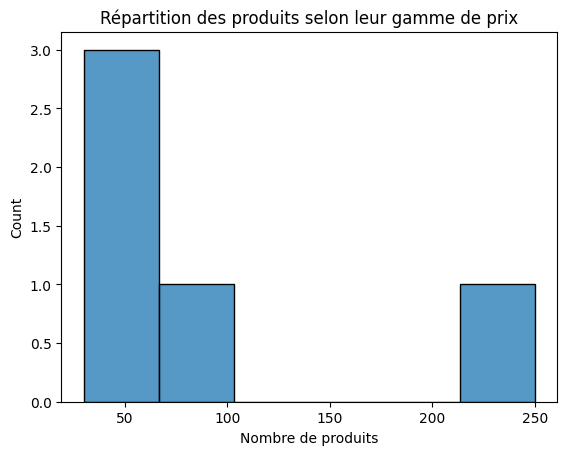

In [ ]:
sns.histplot(df_ventes, x = 'PrixUnitaire')
plt.xlabel('Prix unitaire')
plt.ylabel('Nombre de produits')
plt.title('Répartition des produits selon leur gamme de prix')
plt.show()

## Scatter plot


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Code de création du df_ventes) ...
df_ventes = pd.DataFrame({
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35]
})

#### Tâches à effectuer

Créez un nuage de points pour visualiser la relation entre PrixUnitaire (sur l'axe X) et VentesMensuelles (sur l'axe Y).

Indices :

1. Utilisez la fonction sns.scatterplot().

2. Ses arguments principaux sont data, x, et y.

3. N'oubliez pas d'habiller votre graphique avec un titre et des labels pertinents pour le rendre facile à interpréter.

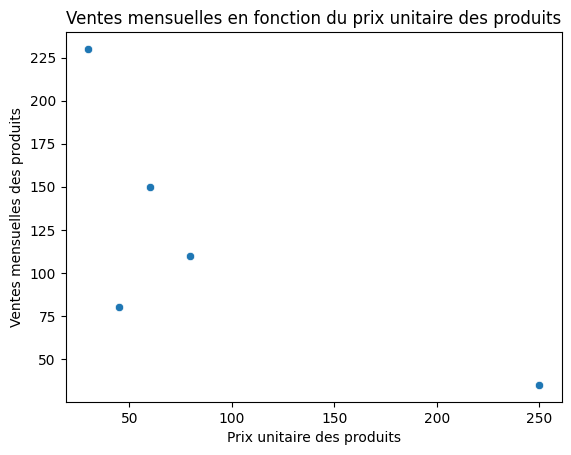

In [ ]:
sns.scatterplot(df_ventes,x='PrixUnitaire',y='VentesMensuelles')
plt.xlabel('Prix unitaire des produits')
plt.ylabel('Ventes mensuelles des produits')
plt.title('Ventes mensuelles en fonction du prix unitaire des produits')
plt.show()

# Mini-projet de synthèse

1. Le Contexte (Votre Rôle)

Vous êtes Data Analyst junior chez "TechBureau", une entreprise de e-commerce qui vend du matériel électronique, des fournitures de bureau et du mobilier.

2. La Mission (La Question Business)

La direction marketing prépare son budget pour le prochain trimestre. Elle a une question fondamentale : "Nous avons un budget limité. Devrions-nous l'investir dans des campagnes d'acquisition pour attirer de nouveaux clients, ou dans des programmes de fidélisation pour choyer nos clients actuels ?"

Pour les aider à trancher, ils vous demandent une première analyse exploratoire (EDA) répondant à cette question :

"Quelles sont les caractéristiques de nos clients les plus rentables ?"

Note : "Rentable" est un terme business. Ce sera à vous, en tant qu'analyste, de le traduire en une mesure technique.

3. Le Jeu de Données

Voici les données de ventes des six derniers mois. Je vous invite à copier-coller ce code dans votre Google Colab pour créer le DataFrame df_ventes.

In [ ]:
import pandas as pd
import numpy as np

# Création du jeu de données
data = {
    'ID_Commande': ['CMD001', 'CMD002', 'CMD003', 'CMD004', 'CMD005', 'CMD006', 'CMD007', 'CMD008', 'CMD009', 'CMD010',
                    'CMD011', 'CMD012', 'CMD013', 'CMD014', 'CMD015', 'CMD016', 'CMD017', 'CMD018', 'CMD019', 'CMD020'],
    'ID_Client': ['C100', 'C101', 'C102', 'C100', 'C103', 'C101', 'C104', 'C105', 'C102', 'C100',
                  'C103', 'C105', 'C101', 'C104', 'C100', 'C102', 'C106', 'C107', 'C106', 'C101'],
    'Date_Commande': pd.to_datetime([
        '2023-01-15', '2023-01-17', '2023-01-20', '2023-02-05', '2023-02-10', '2023-02-12', '2023-03-01', '2023-03-03',
        '2023-03-15', '2023-04-01', '2023-04-05', '2023-04-07', '2023-05-10', '2023-05-12', '2023-05-15', '2023-06-01',
        '2023-06-03', '2023-06-05', '2023-06-10', '2023-06-12'
    ]),
    'Categorie_Produit': [
        'Électronique', 'Fournitures', 'Électronique', 'Mobilier', 'Fournitures', 'Électronique', 'Fournitures', 'Mobilier',
        'Fournitures', 'Électronique', 'Électronique', 'Fournitures', 'Fournitures', 'Mobilier', 'Mobilier', 'Électronique',
        'Fournitures', 'Électronique', 'Mobilier', 'Fournitures'
    ],
    'Prix_Unitaire': [120, 15, 80, 250, 20, 120, 10, 300, 25, 120, 80, 15, 20, 250, 300, 80, 10, 120, 250, 15],
    'Quantite': [1, 5, 2, 1, 10, 1, 20, 1, 8, 3, 2, 5, 10, 1, 1, 1, 30, 1, 1, 10],
    'Region_Client': ['Sud', 'Nord', 'Ouest', 'Sud', 'Est', 'Nord', 'Ouest', 'Est', 'Ouest', 'Sud',
                      'Est', 'Est', 'Nord', 'Ouest', 'Sud', 'Ouest', 'Nord', 'Sud', 'Nord', 'Nord']
}

df_ventes = pd.DataFrame(data)

#### 1. Exploration Initiale

"Quelle serait la toute première étape pour simplement 'faire connaissance' avec ce DataFrame df_ventes ?"

(Suivi) "Pourriez-vous me montrer le code pour :

Afficher les premières lignes ?

Obtenir un résumé technique (types de données, détection des données manquantes) ?"

In [ ]:
df_ventes.head()


,ID_Commande,ID_Client,Date_Commande,Categorie_Produit,Prix_Unitaire,Quantite,Region_Client
0,CMD001,C100,2023-01-15,Électronique,120,1,Sud
1,CMD002,C101,2023-01-17,Fournitures,15,5,Nord
2,CMD003,C102,2023-01-20,Électronique,80,2,Ouest
3,CMD004,C100,2023-02-05,Mobilier,250,1,Sud
4,CMD005,C103,2023-02-10,Fournitures,20,10,Est


In [ ]:
print(df_ventes.describe())
print(df_ventes.info())

             Date_Commande  Prix_Unitaire   Quantite  MontantCommande  \
count                   20      20.000000  20.000000        20.000000   
mean   2023-04-01 16:48:00     110.000000   5.700000       193.500000   
min    2023-01-15 00:00:00      10.000000   1.000000        75.000000   
25%    2023-02-11 12:00:00      18.750000   1.000000       120.000000   
50%    2023-04-03 00:00:00      80.000000   2.000000       200.000000   
75%    2023-05-19 06:00:00     152.500000   8.500000       250.000000   
max    2023-06-12 00:00:00     300.000000  30.000000       360.000000   
std                    NaN     103.771003   7.574889        83.604646   

       Montant_Commande  
count         20.000000  
mean         193.500000  
min           75.000000  
25%          120.000000  
50%          200.000000  
75%          250.000000  
max          360.000000  
std           83.604646  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   C

#### 2. Feature Engineering (Création de la rentabilité par commande)

"En regardant les colonnes disponibles, comment pourrions-nous calculer une valeur qui représente la 'rentabilité' de chaque commande ?"

(Suivi) "Pourriez-vous m'écrire la ligne de code Python pour créer une nouvelle colonne dans df_ventes appelée Montant_Commande ?"

In [ ]:
df_ventes['Montant_Commande'] = df_ventes['Prix_Unitaire']*df_ventes['Quantite']


#### 3. Agrégation (Passage au niveau "Client")

"Comment pouvons-nous transformer notre DataFrame df_ventes en un nouveau DataFrame df_clients qui n'aurait qu'une seule ligne par ID_Client unique ?"

(Suivi) "Ce nouveau DataFrame devrait contenir, pour chaque client :

Le montant total qu'il a dépensé.

Le nombre total de commandes qu'il a passées."

In [ ]:
aggreg_client_dict = {'Montant_Commande':'sum','ID_Commande':'count'}
df_client = df_ventes.groupby('ID_Client').agg(aggreg_client_dict)
df_client = df_client.rename(columns={'Montant_Commande':'Montant_Total_Depense','ID_Commande':'Nombre_Commandes'})
df_client.head(10)

,Montant_Total_Depense,Nombre_Commandes
ID_Client,,
C100,1030,4
C101,545,4
C102,440,3
C103,360,2
C104,450,2
C105,375,2
C106,550,2
C107,120,1


#### 4. Analyse et Visualisation

Mission 1 : "Comment pourriez-vous modifier df_client pour voir immédiatement qui sont nos 3 clients 'Top Tiers' (ceux qui ont dépensé le plus) ?"

Mission 2 : "Nous voulons comparer le Montant_Total_Depense (variable numérique) entre les différents ID_Client (variable catégorielle). Quel type de graphique serait le plus approprié pour cette tâche ?"

In [ ]:
df_client_top_3 = df_client.sort_values(by = 'Montant_Total_Depense', ascending = False)
#df_client_top_3 = df_client_top_3.iloc[:3,:]
df_client_top_3

# Correction, pas besoin d'iloc, simplement .head(3) aurait suffi
df_client_top_3 = df_client.sort_values(by = 'Montant_Total_Depense', ascending = False).head(3)
df_client_top_3

,Montant_Total_Depense,Nombre_Commandes
ID_Client,,
C100,1030,4
C106,550,2
C101,545,4


#### 5. Visualisation de données

Créez ce diagramme en barres. Je vous propose de visualiser tous les clients de votre df_client (pas seulement le top 3) pour avoir une vue d'ensemble de la distribution.

Pourriez-vous m'écrire le code Python, en utilisant Seaborn (sns.barplot), pour réaliser ce graphique ?

Indice 1 : Vous utiliserez sns.barplot(data=..., x=..., y=...).

Indice 2 (Important) : Rappelez-vous que ID_Client est devenu l'index de votre df_client (à cause du groupby). Ce n'est pas une colonne. Vous devrez donc peut-être utiliser df_client.index pour votre axe X.

Indice 3 : N'oubliez pas "d'habiller" votre graphique. Utilisez plt.title() pour donner un titre clair (ex: "Dépenses Totales par Client"), et plt.ylabel() pour préciser l'unité (ex: "Montant Total Dépensé (€)").

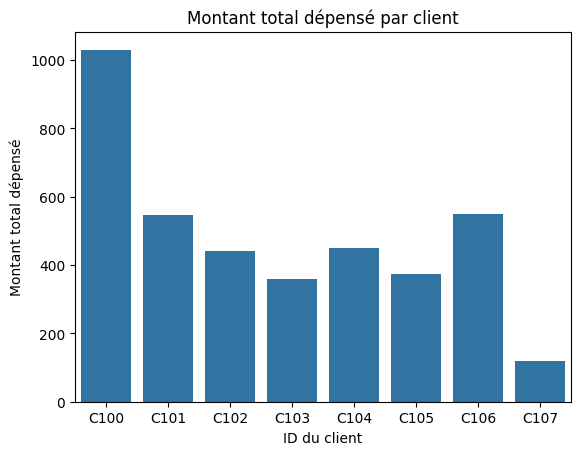

<Axes: xlabel='ID_Client', ylabel='Montant_Total_Depense'>

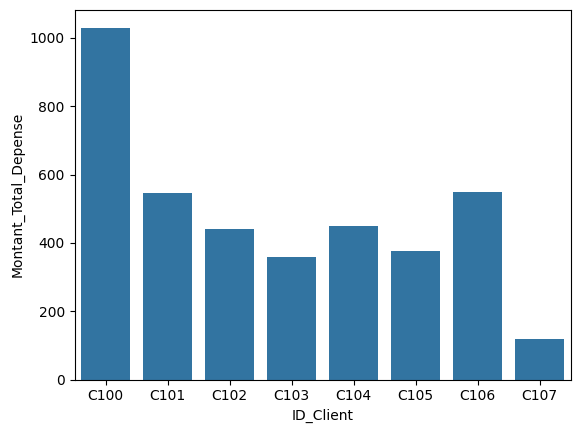

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(df_client, x = df_client.index, y = df_client['Montant_Total_Depense'])
plt.xlabel('ID du client')
plt.ylabel('Montant total dépensé')
plt.title('Montant total dépensé par client')
plt.show()

# Correction : pas besoin de repasser df_client pour le y + ne pas oublier "data =":
# ex:
sns.barplot(data = df_client, x = df_client.index, y='Montant_Total_Depense')

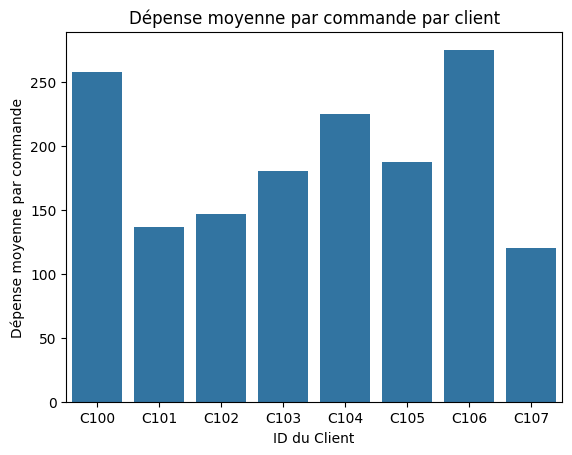

In [ ]:
df_client['Depense_Moyenne_Par_Commande'] = df_client['Montant_Total_Depense']/df_client['Nombre_Commandes']
sns.barplot(data = df_client, x=df_client.index, y = 'Depense_Moyenne_Par_Commande')
plt.xlabel('ID du Client')
plt.ylabel('Dépense moyenne par commande')
plt.title('Dépense moyenne par commande par client')
plt.show()

#### 6. Analyse Croisée (Relation)

Nous avons répondu à la première partie de la question : "Qui sont les clients les plus rentables ?". Le graphique à barres nous le montre.

Mais la question complète est : "Quelles sont leurs caractéristiques ?".

Nous avons une autre caractéristique très intéressante dans notre df_client : la colonne Nombre_Commandes.

La prochaine question logique pour la direction marketing est : "Est-ce que les clients qui dépensent le plus sont aussi ceux qui commandent le plus souvent (nos clients fidèles) ?"

Nous devons maintenant analyser la relation entre deux variables :

Montant_Total_Depense (numérique)

Nombre_Commandes (numérique)

Votre Mission (Problème Pratique) :

En vous basant sur notre Session n°3 (Compétence 5), quel type de graphique est l'outil parfait pour visualiser la relation (et une éventuelle corrélation) entre deux variables numériques ?

Pourriez-vous m'écrire le code (en utilisant Seaborn) pour créer ce graphique ?

Utilisez data=df_client.

Mettez le Nombre_Commandes sur l'axe X.

Mettez le Montant_Total_Depense sur l'axe Y.

N'oubliez pas "d'habiller" le graphique avec un titre et des labels clairs !

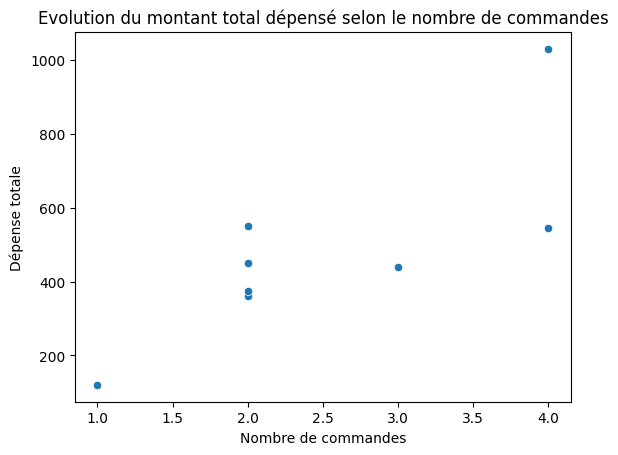

In [ ]:
sns.scatterplot(data = df_client, x = 'Nombre_Commandes', y = 'Montant_Total_Depense')
plt.xlabel('Nombre de commandes')
plt.ylabel('Dépense totale')
plt.title('Evolution du montant total dépensé selon le nombre de commandes')
plt.show()

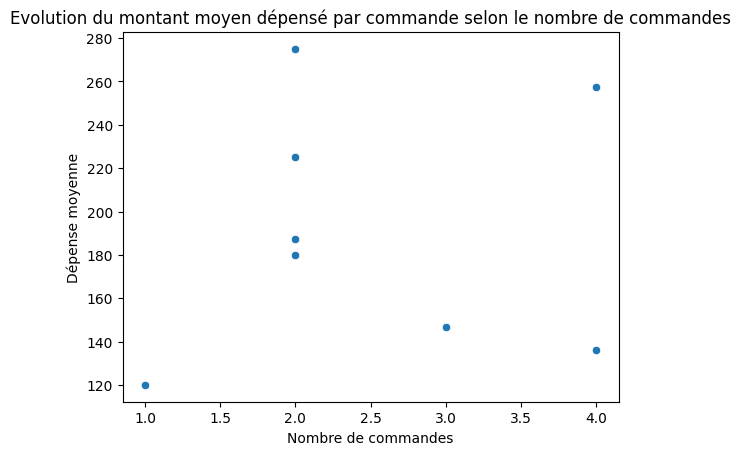

In [ ]:
sns.scatterplot(data = df_client, x = 'Nombre_Commandes', y = 'Depense_Moyenne_Par_Commande')
plt.xlabel('Nombre de commandes')
plt.ylabel('Dépense moyenne')
plt.title('Evolution du montant moyen dépensé par commande selon le nombre de commandes')
plt.show()

#### 7. Synthèse et Segmentation Client (Le Défi Final)
Pour notre mini-projet, terminons par une synthèse qui sera directement utilisable par le marketing.

Nous allons créer des segments de clients. C'est un cas d'usage classique du Feature Engineering (Session n°1) combiné à l'Agrégation (Session n°2).

Nous allons créer une nouvelle colonne Segment_Client dans notre df_client.

Votre Mission (Problème Pratique) :

Nous allons définir un "Client Or" comme un client qui est au-dessus de la moyenne sur les deux métriques : le montant total dépensé ET le nombre de commandes.

Pour ce faire, vous devrez :

Calculer les benchmarks (les moyennes) :

Calculez le montant_moyen_total (la moyenne de la colonne Montant_Total_Depense de df_client).

Calculez le nombre_moyen_commandes (la moyenne de la colonne Nombre_Commandes de df_client).

Créer la colonne de segment :

Créez une nouvelle colonne Segment_Client dans df_client.

Utilisez la fonction np.where() (vue dans la Compétence 4, Session n°1) pour appliquer la logique suivante :

SI (Montant_Total_Depense du client > montant_moyen_total) ET (Nombre_Commandes du client > nombre_moyen_commandes)

ALORS la valeur sera "Client Or"

SINON la valeur sera "Client Standard"

(Indice : La syntaxe pour le "ET" logique dans Pandas/Numpy est l'opérateur &, et vous devrez entourer chaque condition de parenthèses.)

In [ ]:
import numpy as np

montant_moyen_total = df_client['Montant_Total_Depense'].mean()
nombre_moyen_commande = df_client['Nombre_Commandes'].mean()
depense_moyenne_par_commande = df_client['Depense_Moyenne_Par_Commande'].mean()

df_client['Segment_Client']=np.where(
    (df_client['Montant_Total_Depense']>montant_moyen_total)&(df_client['Nombre_Commandes']>nombre_moyen_commande)&(df_client['Depense_Moyenne_Par_Commande']>depense_moyenne_par_commande),
    "Client Or",
    "Client Standard")
df_client['Segment_Client']

,Segment_Client
ID_Client,
C100,Client Or
C101,Client Standard
C102,Client Standard
C103,Client Standard
C104,Client Standard
C105,Client Standard
C106,Client Standard
C107,Client Standard


# Nettoyage de données

## Suppression des valeurs manquantes

In [1]:
import pandas as pd
import numpy as np

donnees_hopital = {
    'ID_Patient': ['P100', 'P101', 'P102', 'P103', 'P104'],
    'Age': [35, 42, np.nan, 28, 56],
    'Genre': ['H', 'F', 'H', 'F', 'H'],
    'Temperature': [37.5, 38.1, 37.5, np.nan, 38.3],
    'ResultatTest': ['Positif', 'Negatif', 'Positif', 'Negatif', np.nan]
}

df_patients_sales = pd.DataFrame(donnees_hopital)

print("Voici le jeu de données 'sale' :")
print(df_patients_sales)

Voici le jeu de données 'sale' :
  ID_Patient   Age Genre  Temperature ResultatTest
0       P100  35.0     H         37.5      Positif
1       P101  42.0     F         38.1      Negatif
2       P102   NaN     H         37.5      Positif
3       P103  28.0     F          NaN      Negatif
4       P104  56.0     H         38.3          NaN


#### Tâche à effectuer

Votre mission : Diagnostiquer les données

1. Affichez le DataFrame booléen qui montre où se trouvent les valeurs manquantes.

2. (Enchaînement) Calculez et affichez le nombre total de valeurs manquantes pour chaque colonne. C'est le diagnostic que vous présenterez à votre équipe. (Indice : une fois que vous avez le DataFrame de True/False, comment pourriez-vous sommer les True ?).

In [3]:
print(df_patients_sales.isna())
print(df_patients_sales.isna().sum())

   ID_Patient    Age  Genre  Temperature  ResultatTest
0       False  False  False        False         False
1       False  False  False        False         False
2       False   True  False        False         False
3       False  False  False         True         False
4       False  False  False        False          True
ID_Patient      0
Age             1
Genre           0
Temperature     1
ResultatTest    1
dtype: int64


#### Tâches à effectuer

1. Stratégie Radicale : Créez un nouveau DataFrame, df_nettoye, qui ne contient plus aucune ligne ayant une valeur manquante. Affichez-le.

2. Stratégie Ciblée : Pour une analyse sur les résultats des tests, vous décidez que vous ne pouvez pas vous permettre d'avoir un ResultatTest manquant, mais que les autres nan sont acceptables pour l'instant. Créez un DataFrame df_test_valide en ne supprimant que les lignes où la colonne ResultatTest est manquante (Indice : utilisez l'argument subset).

In [4]:
import pandas as pd
import numpy as np

donnees_hopital = {
    'ID_Patient': ['P100', 'P101', 'P102', 'P103', 'P104'],
    'Age': [35, 42, np.nan, 28, 56],
    'Genre': ['H', 'F', 'H', 'F', 'H'],
    'Temperature': [37.5, 38.1, 37.5, np.nan, 38.3],
    'ResultatTest': ['Positif', 'Negatif', 'Positif', 'Negatif', np.nan]
}
df_patients_sales = pd.DataFrame(donnees_hopital)

print("DataFrame de départ :")
print(df_patients_sales)

DataFrame de départ :
  ID_Patient   Age Genre  Temperature ResultatTest
0       P100  35.0     H         37.5      Positif
1       P101  42.0     F         38.1      Negatif
2       P102   NaN     H         37.5      Positif
3       P103  28.0     F          NaN      Negatif
4       P104  56.0     H         38.3          NaN


In [6]:
df_nettoye = df_patients_sales.dropna()
df_nettoye

,ID_Patient,Age,Genre,Temperature,ResultatTest
0,P100,35.0,H,37.5,Positif
1,P101,42.0,F,38.1,Negatif


In [8]:
df_test_valide = df_patients_sales.dropna(subset=['ResultatTest'])
df_test_valide

,ID_Patient,Age,Genre,Temperature,ResultatTest
0,P100,35.0,H,37.5,Positif
1,P101,42.0,F,38.1,Negatif
2,P102,NaN,H,37.5,Positif
3,P103,28.0,F,NaN,Negatif


## Remplacement des valeurs manquantes